# Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib
import pickle
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, KFold

# Load Data

In [ ]:
!git clone https://github.com/Hafiyyanrevi/Drug-Side-Effect-Prediction-GSA-SVM.git data_TA

Cloning into 'data_TA'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 156 (delta 49), reused 54 (delta 21), pack-reused 64
Receiving objects: 100% (156/156), 658.53 KiB | 2.01 MiB/s, done.
Resolving deltas: 100% (62/62), done.


**Load the training data and test data**

In [ ]:
X_train = pd.read_csv('data_TA/results/PreProcessing/X_train_smilesdataset.csv')
y_train = pd.read_csv('data_TA/results/PreProcessing/y_train_smilesdataset.csv')

In [ ]:
X_test = pd.read_csv('data_TA/results/PreProcessing/X_test_smilesdataset.csv')
y_test = pd.read_csv('data_TA/results/PreProcessing/y_test_smilesdataset.csv')

**Calculate the sum of each unique value**

In [5]:
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

**Load the convergence data pickle file**

In [ ]:
with open('data_TA/results/FeatureSelection/linear/convergence_data_linear.pkl', 'rb') as pickle_file:
    linear = joblib.load(pickle_file)
with open('data_TA/results/FeatureSelection/rbf/convergence_data_rbf.pkl', 'rb') as pickle_file:
    rbf = joblib.load(pickle_file)
with open('data_TA/results/FeatureSelection/polynomial/convergence_data_poly.pkl', 'rb') as pickle_file:
    poly = joblib.load(pickle_file)

**Load the subset features and all features from feature selection**

In [ ]:
with open('data_TA/results/PreProcessing/VTresult.pkl', 'rb') as pickle_file:
    features_result = joblib.load(pickle_file)

In [8]:
X_train_selected = X_train.loc[:, features_result]

In [ ]:
with open('data_TA/results/FeatureSelection/linear/theBest_features_linear.pkl', 'rb') as pickle_file:
    theBest_features_linear = joblib.load(pickle_file)
with open('data_TA/results/FeatureSelection/rbf/theBest_features_rbf.pkl', 'rb') as pickle_file:
    theBest_features_rbf = joblib.load(pickle_file)
with open('data_TA/results/FeatureSelection/polynomial/theBest_features_poly.pkl', 'rb') as pickle_file:
    theBest_features_poly = joblib.load(pickle_file)

In [10]:
X_train_selected_linear = X_train.loc[:, theBest_features_linear]
X_train_selected_rbf = X_train.loc[:, theBest_features_rbf]
X_train_selected_poly = X_train.loc[:, theBest_features_poly]

**Linear**

In [11]:
model_selected = SVC(kernel='linear')
model_all = SVC(kernel='linear')

allFeatures_linear = cross_val_score(model_all, X_train_selected.values, y_train.values, scoring="f1", cv=10, n_jobs=-1).mean()
subset_linear = cross_val_score(model_selected, X_train_selected_linear, y_train.values, scoring="f1", cv=10, n_jobs=-1).mean()

**RBF**

In [12]:
model_selected = SVC(kernel='rbf')
model_all = SVC(kernel='rbf')

allFeatures_rbf = cross_val_score(model_all, X_train_selected.values, y_train.values, scoring="f1", cv=10, n_jobs=-1).mean()
subset_rbf = cross_val_score(model_selected, X_train_selected_rbf, y_train.values, scoring="f1", cv=10, n_jobs=-1).mean()

**Polynomial**

In [13]:
model_selected = SVC(kernel='poly')
model_all = SVC(kernel='poly')

allFeatures_poly = cross_val_score(model_all, X_train_selected.values, y_train.values, scoring="f1", cv=10, n_jobs=-1).mean()
subset_poly = cross_val_score(model_selected, X_train_selected_poly, y_train.values, scoring="f1", cv=10, n_jobs=-1).mean()

**Load default parameter & the best parameter from hyperparameter tuning**

In [ ]:
with open('data_TA/results/HyperparameterTuning/Linear/mean_accuracy_default.pkl', 'rb') as pickle_file:
    mean_default_linear = joblib.load(pickle_file)
with open('data_TA/results/HyperparameterTuning/RBF/mean_accuracy_default.pkl', 'rb') as pickle_file:
    mean_default_rbf = joblib.load(pickle_file)
with open('data_TA/results/HyperparameterTuning/Polynomial/mean_accuracy_default.pkl', 'rb') as pickle_file:
    mean_default_poly = joblib.load(pickle_file)

In [ ]:
with open('data_TA/results/HyperparameterTuning/Linear/mean_score_linear.pkl', 'rb') as pickle_file:
    mean_score_linear = joblib.load(pickle_file)
with open('data_TA/results/HyperparameterTuning/RBF/mean_score_rbf.pkl', 'rb') as pickle_file:
    mean_score_rbf = joblib.load(pickle_file)
with open('data_TA/results/HyperparameterTuning/Polynomial/mean_score_poly.pkl', 'rb') as pickle_file:
    mean_score_poly = joblib.load(pickle_file)

# Sample Comparison of Each Class in Training Data & Test Data

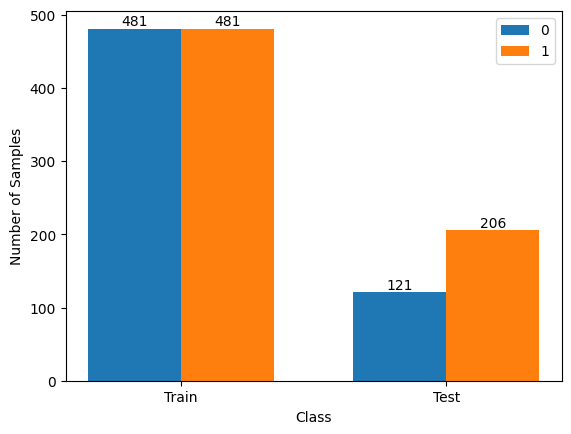

In [16]:
# Masukkan Data
models = ['Train', 'Test']
index_zero = [train_counts.get(0, 0), test_counts.get(0, 0)]
index_one = [train_counts.get(1, 0), test_counts.get(1, 0)]

# Melakukan Plot
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(models))


bar_zero = ax.bar(index, index_zero, bar_width, label='0')
bar_one = ax.bar(index + bar_width, index_one, bar_width, label='1')

# Menambahkan Label Pada Bar, serta Judul
def add_labels(bars):
    for bar in bars:
        yval_score = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval_score, round(yval_score, 4), ha='center', va='bottom')

add_labels(bar_zero)
add_labels(bar_one)

ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Menampilkan Plot
plt.show()

**PCA for training data**

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

In [19]:
# Combine PCA results with labels
pca_df = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = y_train.values.flatten()  # Assuming y_train is a DataFrame

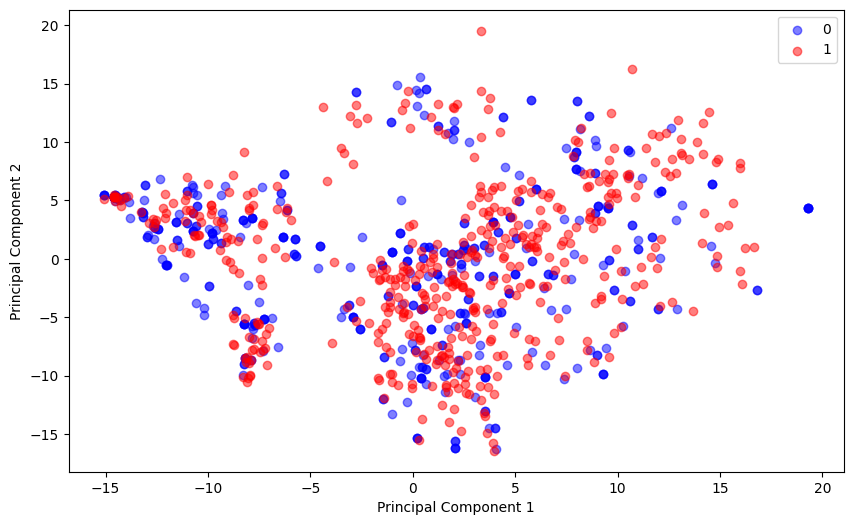

In [20]:
# Plot using PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df.loc[pca_df['Label'] == 0, 'PC1'], pca_df.loc[pca_df['Label'] == 0, 'PC2'], label='0', alpha=0.5, color='blue')
plt.scatter(pca_df.loc[pca_df['Label'] == 1, 'PC1'], pca_df.loc[pca_df['Label'] == 1, 'PC2'], label='1', alpha=0.5, color='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

**PCA for test data**

In [21]:
# Standardize the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
# Perform PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

In [23]:
# Combine PCA results with labels
pca_df = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = y_test.values.flatten()  # Assuming y_test is a DataFrame

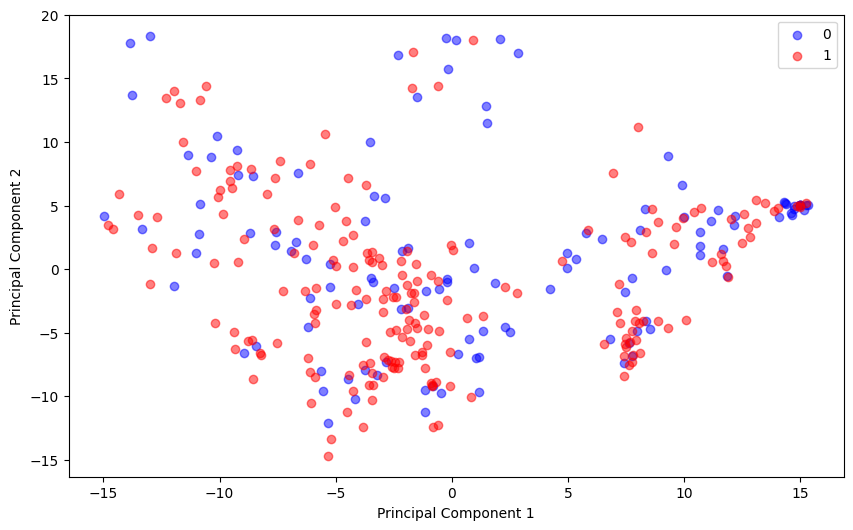

In [24]:
# Plot using PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df.loc[pca_df['Label'] == 0, 'PC1'], pca_df.loc[pca_df['Label'] == 0, 'PC2'], label='0', alpha=0.5, color='blue')
plt.scatter(pca_df.loc[pca_df['Label'] == 1, 'PC1'], pca_df.loc[pca_df['Label'] == 1, 'PC2'], label='1', alpha=0.5, color='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Convergence Data

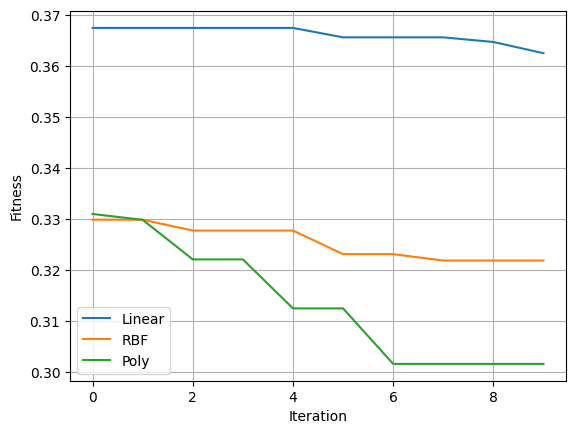

In [25]:
# Melakukan Plot
plt.plot(linear[0], linear[1], label='Linear')

plt.plot(rbf[0], rbf[1], label='RBF')

plt.plot(poly[0], poly[1], label='Poly')

# Menambahkan Label, serta Judul
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)

# Menampilkan Plot
plt.show()

# Accuracy Comparison between Subset and All Features

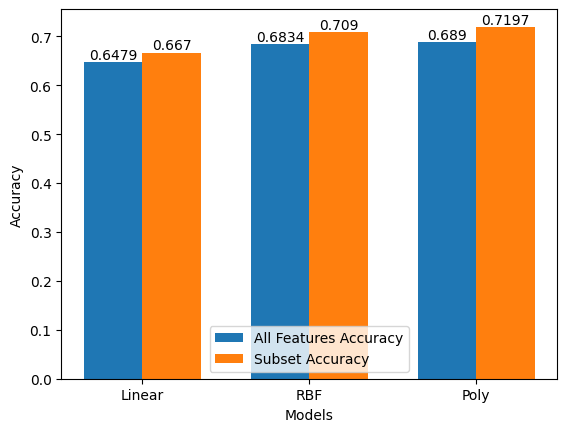

In [28]:
# Masukkan Data
models = ['Linear', 'RBF', 'Poly']
all_features_accuracy = [allFeatures_linear, allFeatures_rbf, allFeatures_poly]
subset_accuracy = [subset_linear, subset_rbf, subset_poly]

# Melakukan Plot
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(models))

bar_all = ax.bar(index, all_features_accuracy, bar_width, label='All Features Accuracy')
bar_subset = ax.bar(index + bar_width, subset_accuracy, bar_width, label='Subset Accuracy')

# Menambahkan Label Pada Bar, serta Judul
def add_labels(bars):
    for bar in bars:
        yval_score = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval_score, round(yval_score, 4), ha='center', va='bottom')

add_labels(bar_all)
add_labels(bar_subset)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend(loc='lower center', fancybox=True)

# Menampilkan Plot
plt.show()

# Model Accuracy Comparison between Default Parameters and Best Parameters

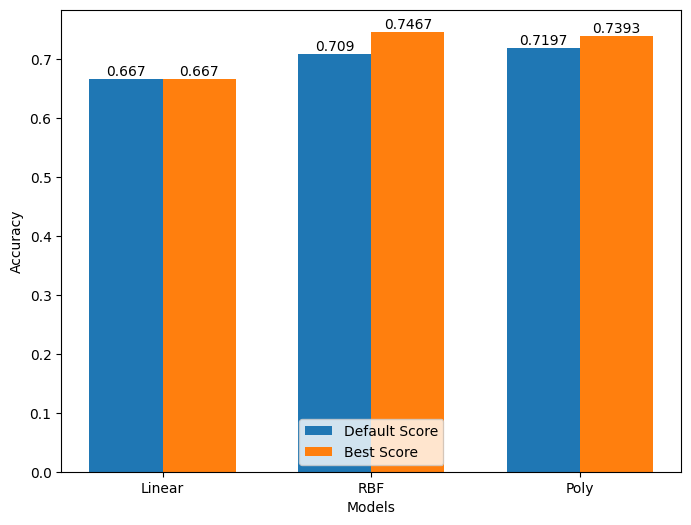

In [27]:
# Masukkan Data
models = ['Linear', 'RBF', 'Poly']
default_scores = [mean_default_linear, mean_default_rbf, mean_default_poly]
best_scores = [mean_score_linear, mean_score_rbf, mean_score_poly]

# Melakukan Plot
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(models))

bar_default = ax.bar(index, default_scores, bar_width, label='Default Score')
bar_best = ax.bar(index + bar_width, best_scores, bar_width, label='Best Score')

# Menambahkan Label Pada Bar, serta Judul
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

add_labels(bar_default)
add_labels(bar_best)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend(loc='lower center', fancybox=True)

# Menampilkan Plot
plt.show()